In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, metrics, svm,model_selection
from IPython.display import Image
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  


In [2]:
review_data = pd.read_csv('/home/dexterslaj/Amazon_mp3.csv', encoding='latin-1')
review_data.head(n=3)
#for x in review_data.itertuples():
    #print(x[3])


,Reviews,Rating
0,It is good if you have internet than you can d...,2.0
1,The RIO rocks! It is so great that Diamond Mul...,5.0
2,I had high hopes for the Diamond Rio and it ce...,4.0


In [3]:
review_data.head(n=3)

,Reviews,Rating
0,It is good if you have internet than you can d...,2.0
1,The RIO rocks! It is so great that Diamond Mul...,5.0
2,I had high hopes for the Diamond Rio and it ce...,4.0


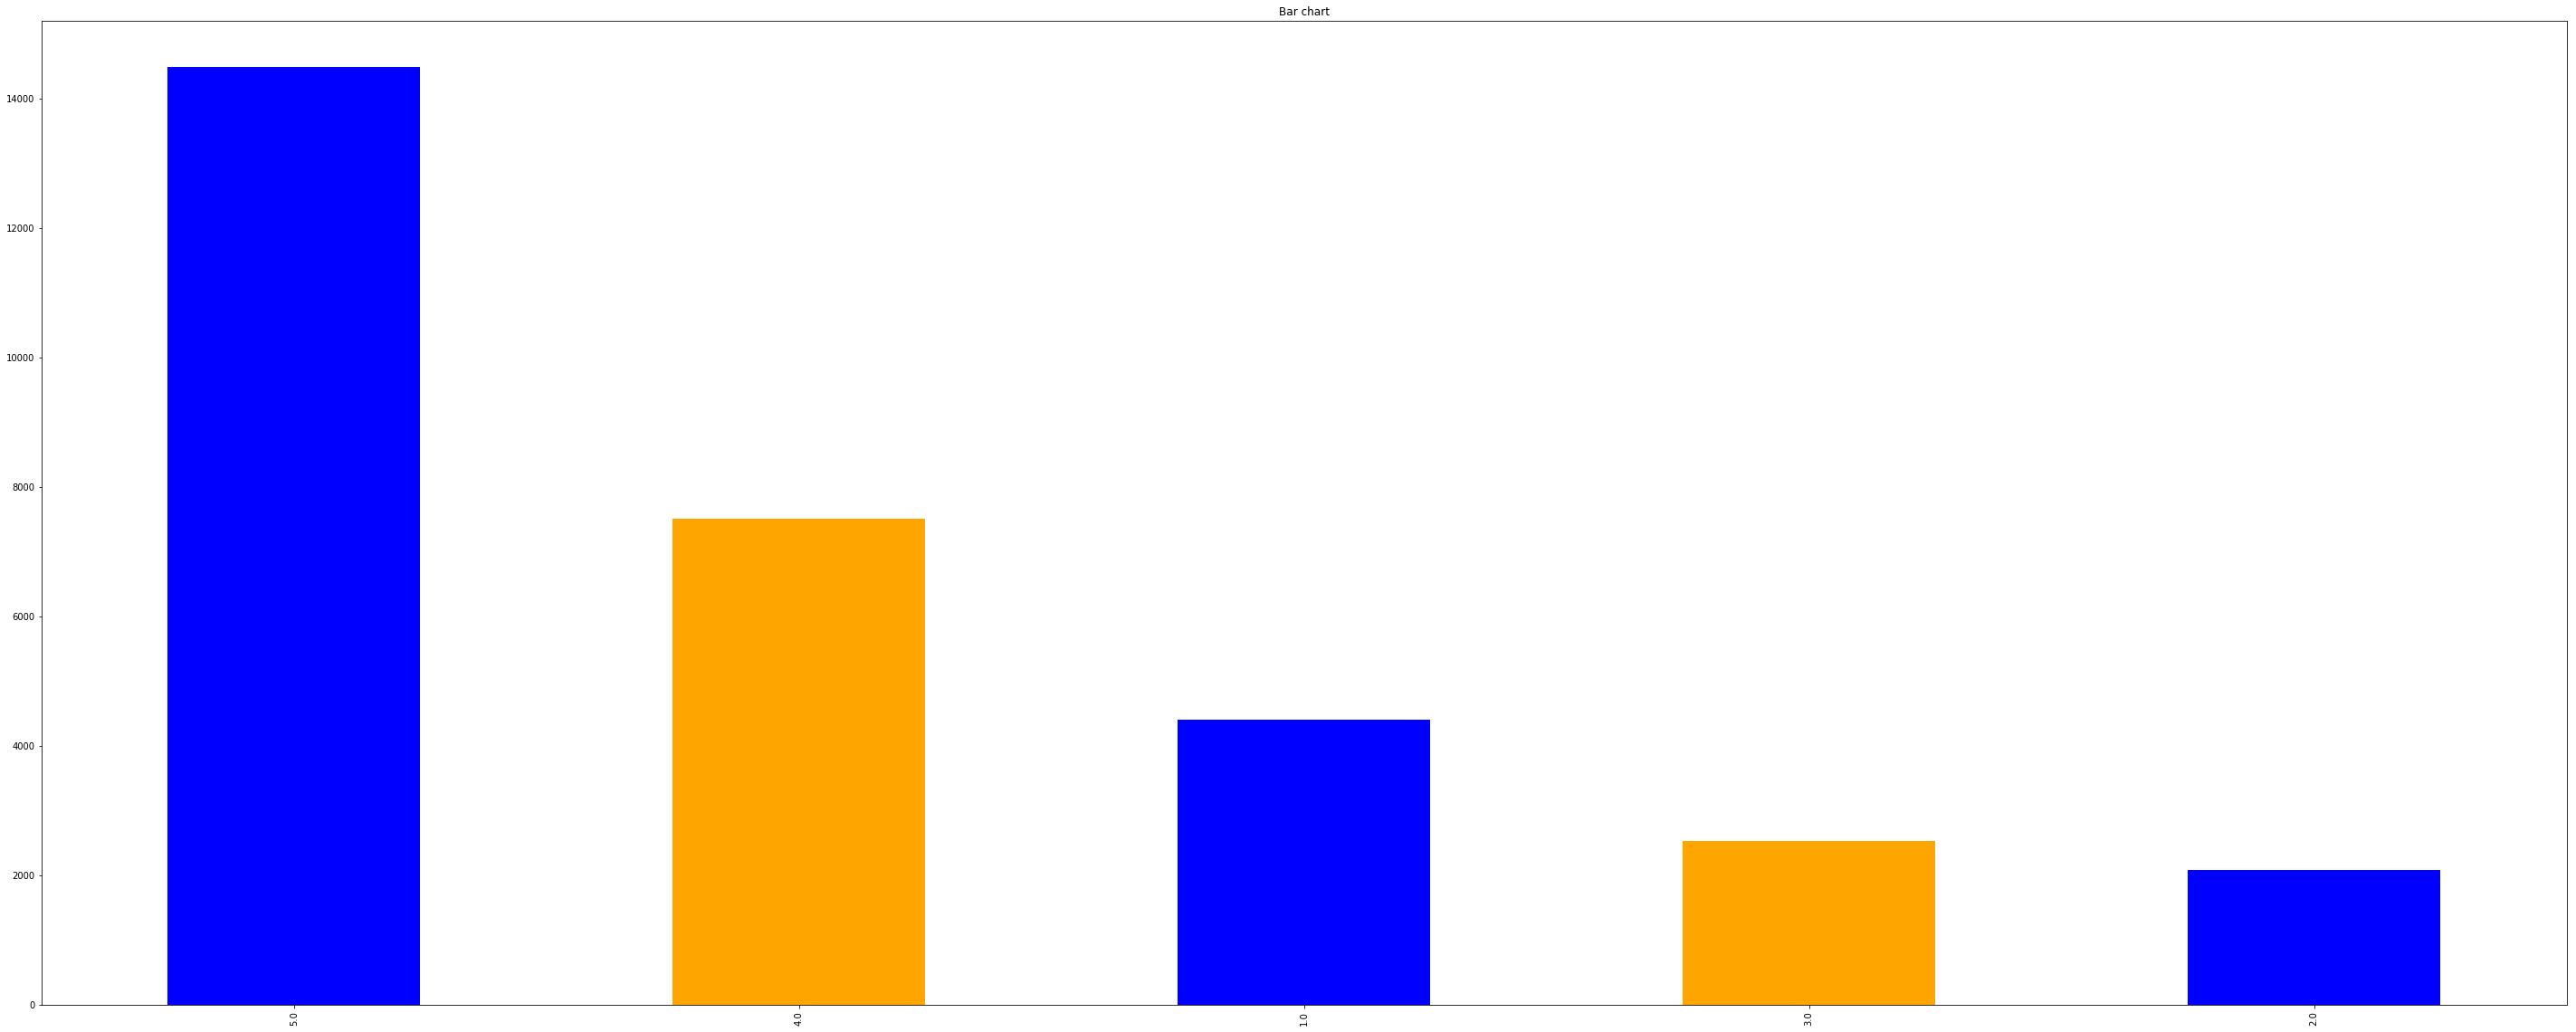

5.0    14479
4.0     7508
1.0     4404
3.0     2531
2.0     2078
Name: Rating, dtype: int64


In [5]:
count_Class=pd.value_counts(review_data["Rating"], sort=True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"],figsize=(50.0,20.0))
plt.title('Bar chart')
plt.show()
print(pd.value_counts(review_data['Rating']))

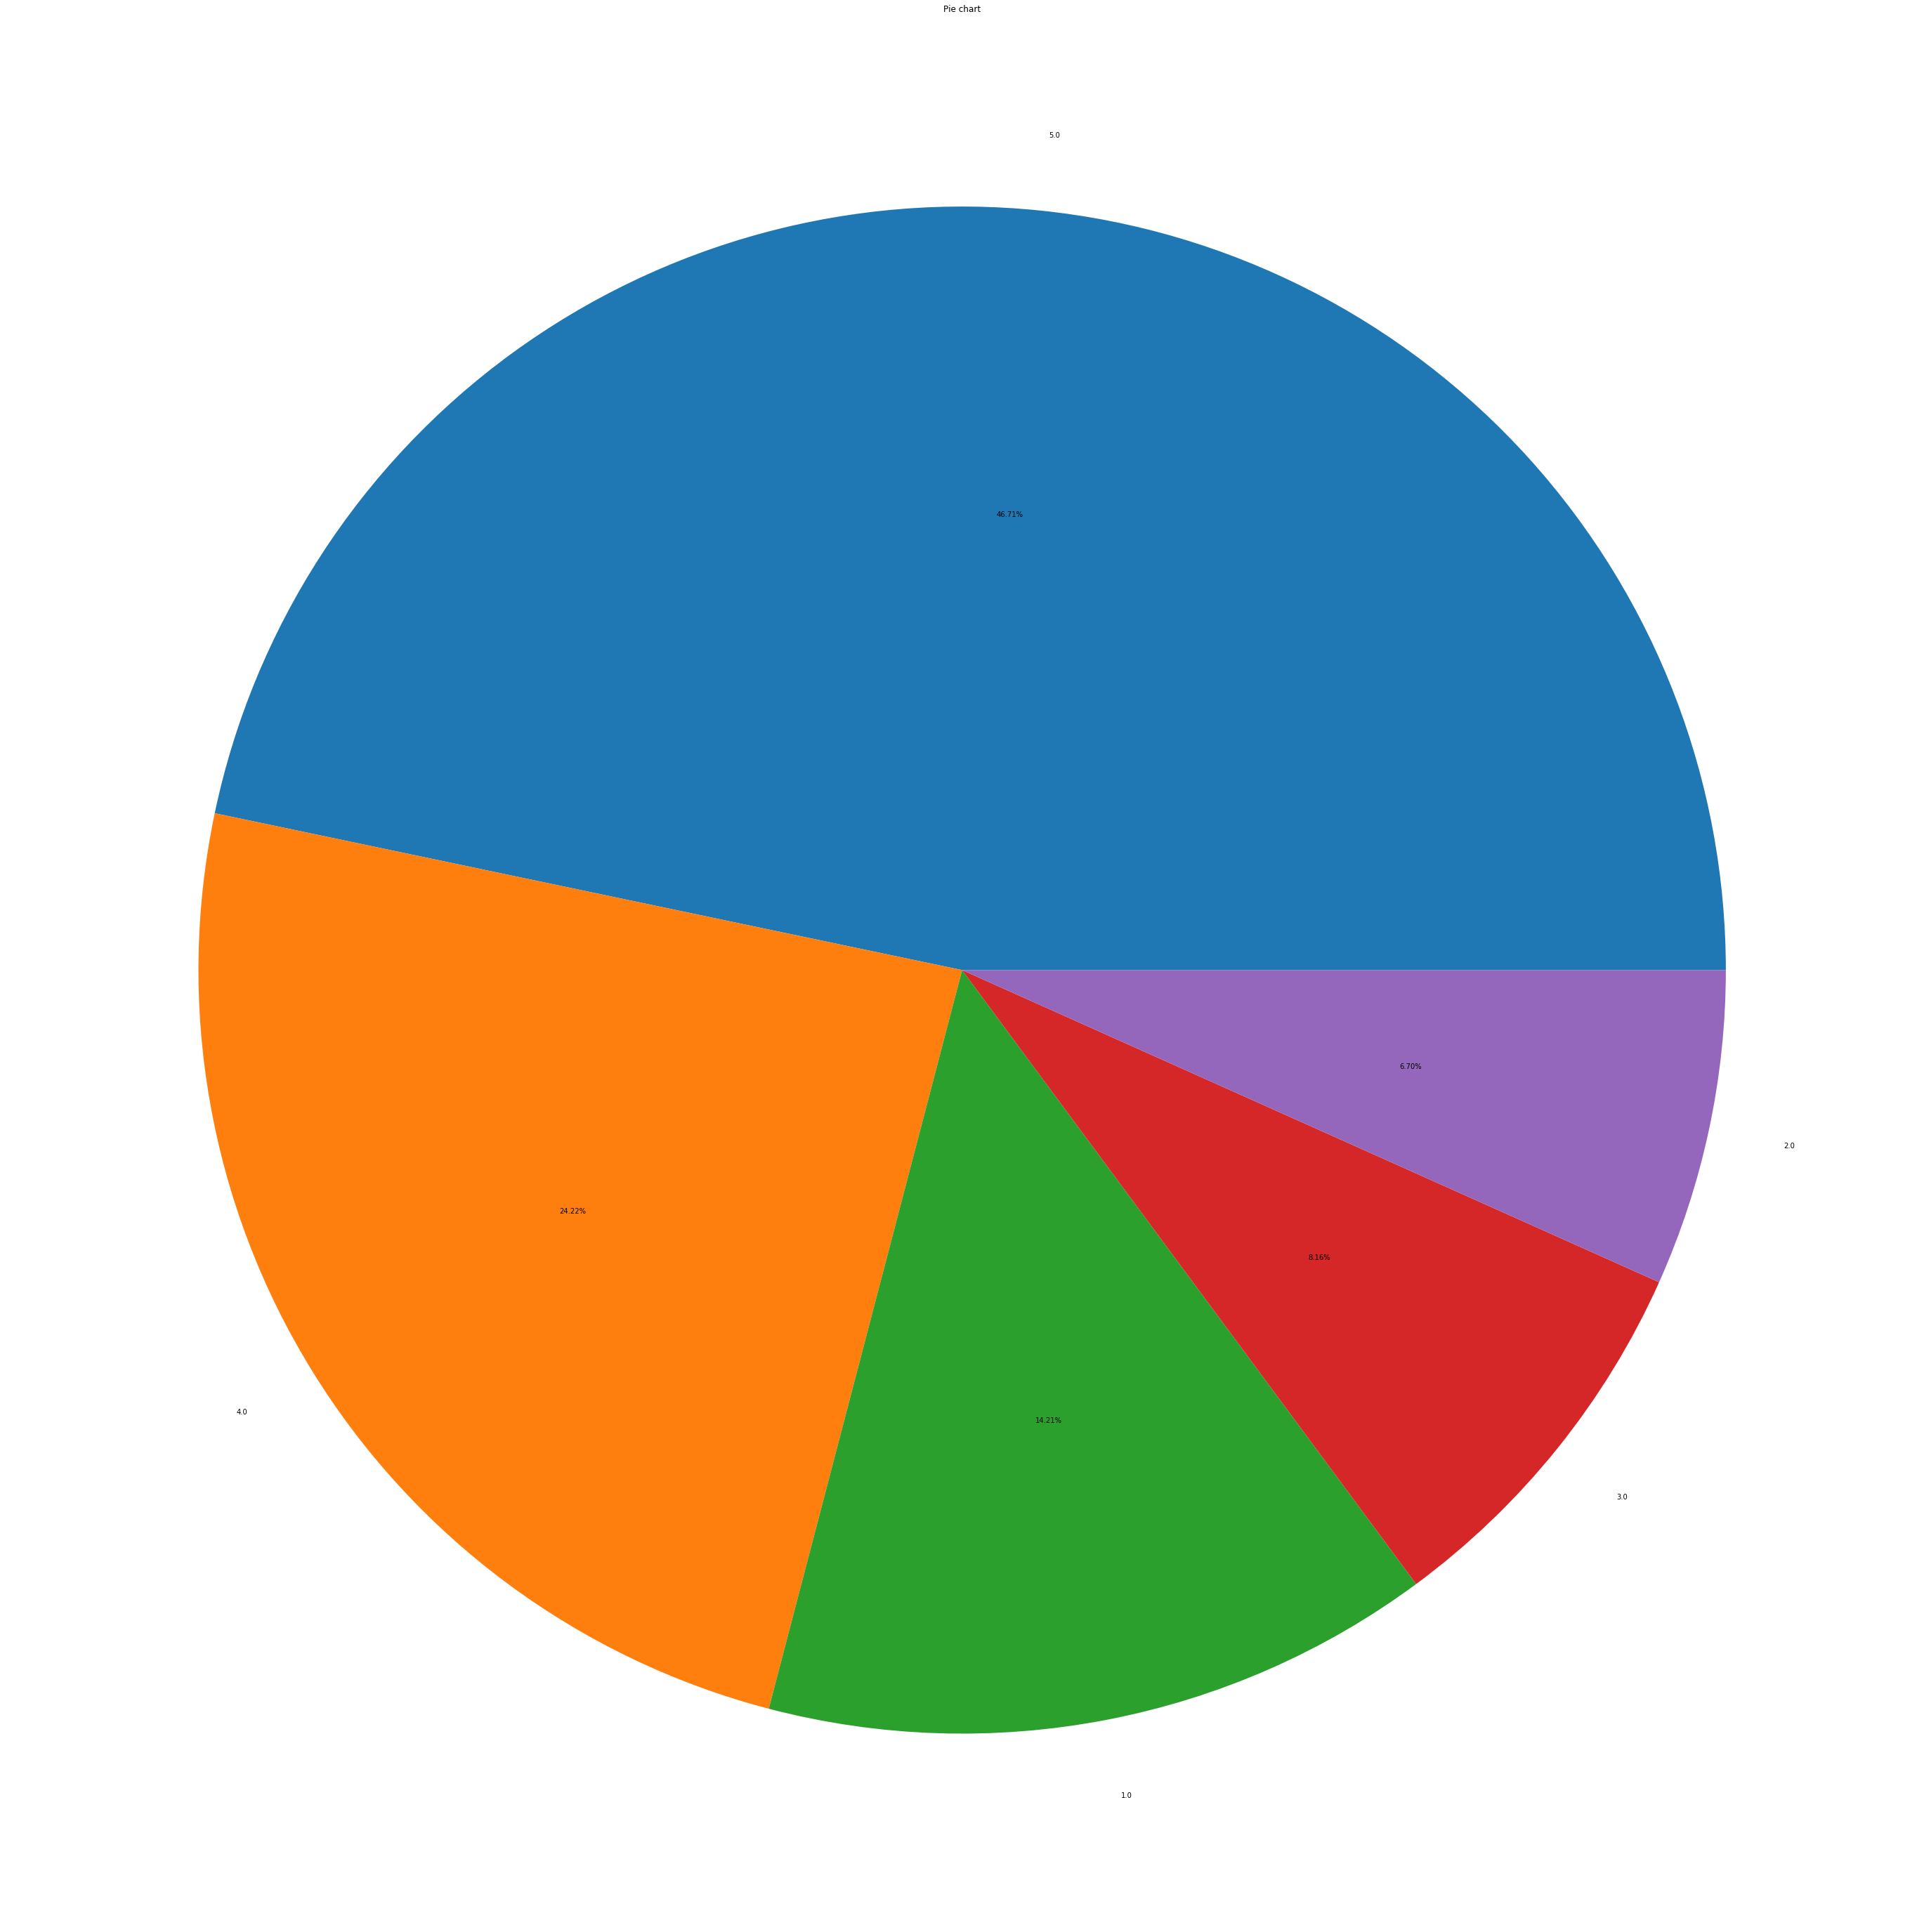

In [6]:
count_Class.plot(kind = 'pie',  autopct='%1.2f%%',figsize=(50.0,50.0))
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [8]:
count1 = Counter(" ".join(review_data[review_data["Rating"]== 1]["Reviews"]).split())

df1 = pd.DataFrame.from_dict(count1,orient='index')
#print(df1)
df1 = df1.rename(columns={0: "wordscount", 1 : "count"})
#print(df1)

In [9]:
count2 = Counter(" ".join(review_data[review_data["Rating"]== 2]["Reviews"]).split())
df2 = pd.DataFrame.from_dict(count2,orient='index')
df2 = df2.rename(columns={0: "wordscount", 1 : "count"})


In [10]:
count4= Counter(" ".join(review_data[review_data["Rating"]== 4]["Reviews"]).split())
df4 = pd.DataFrame.from_dict(count4,orient='index')
df4 = df4.rename(columns={0: "wordscount", 1 : "count"})

In [11]:
count3 = Counter(" ".join(review_data[review_data["Rating"]== 3]["Reviews"]).split())
df3 = pd.DataFrame.from_dict(count3,orient='index')
df3 = df3.rename(columns={0: "wordscount", 1 : "count"})

In [12]:
count5 = Counter(" ".join(review_data[review_data["Rating"]== 5]["Reviews"]).split())
df5 = pd.DataFrame.from_dict(count5,orient='index')
df5 = df5.rename(columns={0: "wordscount", 1 : "count"})


In [13]:
print(df1)
print(df2)
print(df3)
print(df4)
print(df5)

                  wordscount
Only                      54
a                      13424
half                     190
an                      2469
hour                     167
of                      8026
&quot;near&quot;           2
quality                  446
music                   1312
makes                    194
this                    5746
format                   153
seriously                 24
flawed.                    6
To                       134
change                   143
you                     4980
eventually                58
have                    4412
to                     18625
upload                    65
new                     1063
music,                   134
i.e.                       6
huge                      70
inconveneince              1
when                    1568
computer                 699
is                      7659
available.                25
...                      ...
(long                      1
ARC                        1
x's           

In [14]:
#snowball= SnowballStemmer('english')

#stopwordslist=list(stopwords.words('english'))

In [15]:
import nltk

In [16]:
#nltk.download('stopwords')

In [17]:
snowball= SnowballStemmer('english')
porter=PorterStemmer()
c=" he is a naughtly boy. he is doing python pythonly in a pythonously better way"
c1=word_tokenize(c)
print(c1)
for x in c1:
    print(snowball.stem(x))
lemmatizer=WordNetLemmatizer()
stopwordslist=list(stopwords.words('english'))

['he', 'is', 'a', 'naughtly', 'boy', '.', 'he', 'is', 'doing', 'python', 'pythonly', 'in', 'a', 'pythonously', 'better', 'way']
he
is
a
naught
boy
.
he
is
do
python
python
in
a
python
better
way


In [18]:
print(stopwordslist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
stopwordslist1=[]
for i in range(116):
    stopwordslist1.append(stopwordslist[i])

In [20]:
print(stopwordslist1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such']


In [62]:
reqstopwrds=['but','if','up','down','against','between','before','after','above','below','few','most','same','both','any','all','then','further','under','over','off']

In [63]:
for x in reqstopwrds:
    if x in stopwordslist1:
        stopwordslist1.remove(x)

In [64]:
print(stopwordslist1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'into', 'through', 'during', 'to', 'from', 'in', 'out', 'on', 'again', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'each', 'more', 'other', 'some', 'such']


In [65]:
print(len(stopwordslist1))

96


In [66]:
x=[]

for i in range(10961):
    x.append(str(i))

#print(x)    

In [67]:
vocabulary={'null'}
print(type(vocabulary))
for i in range(10961):
    temp_review=review_data.iloc[[i]]
    temp_message=str(temp_review[['Reviews']])
   # print(type(temp_message))
    tempwords=word_tokenize(temp_message)
    for w in tempwords:
        if  w  in x:
            tempwords.remove(w)
   # print (tempwords)  
    for w in tempwords:
        vocabulary |= set(tempwords)


<class 'set'>


In [68]:
print(len(vocabulary))  
#print(vocabulary)

7640


In [69]:
stemvocab=[]
for w in vocabulary:
    x=snowball.stem(w)
    #print(x)
    stemvocab.append(x)

In [70]:
print(len(stemvocab))
#print(vocabulary)
#print(stemvocab)

7640


In [71]:
lemvocab=[]
for w in vocabulary:
    x=lemmatizer.lemmatize(w)
    lemvocab.append(x)

In [72]:
print (len(lemvocab))

7640


In [73]:
#print(lemvocab)

In [74]:
stopvocab=[]
for w in vocabulary:
   # print(w)
    if w in stopwordslist1:
        continue
    else:    
        stopvocab.append(w)

In [75]:
#print(stopvocab)
print(len(stopvocab))# 1379


7557


In [76]:
stoplemvocab=[]
for w in stopvocab:
    x=lemmatizer.lemmatize(w)
    stoplemvocab.append(x)

In [77]:
#print(set(stoplemvocab))
print(len(set(stoplemvocab)))# 1325
stoplemvocab1=set(stoplemvocab)

#print(stoplemvocab1)
stoplemvocabfile=open("stoplemvocabAmazonMP3.txt","w+")
for x in stoplemvocab1:
    stoplemvocabfile.write(x+"\n")
    
#print(len(stoplemvocab1))
stoplemvocablist=list(stoplemvocab1)
#print(stoplemvocablist[2:9])

7254


In [80]:
#still vocabulary is very big and contains irrelevant info which is :--
#numbers

# removing words made of numbers only ex '9087','44545' etc.
stoplemvocablist1=[]
for x in stoplemvocablist:
    flag=0
    for y in x:
        if y>='0' and y<='9':
            flag=1
        else:
            flag=0
            break
    if flag==0:
        stoplemvocablist1.append(x)

In [81]:
print(len(stoplemvocablist1)) 
#print(stoplemvocablist1) 

7233


In [82]:
# removing non alphanumeric charachters from words

In [83]:
countvect=feature_extraction.text.CountVectorizer(vocabulary=stoplemvocablist1)
tfidfvect=feature_extraction.text.TfidfVectorizer()
tfidfvect_slv=feature_extraction.text.TfidfVectorizer(vocabulary=stoplemvocablist1)

In [84]:

X_slv_cv=countvect.transform(review_data['Reviews'])

In [85]:
np.shape(X_slv_cv)# finally using countvectorizer we have vector matrix 

(31000, 7233)

In [86]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = model_selection.train_test_split(X_slv_cv, review_data['Rating'], test_size=0.33, random_state=42)

In [87]:
#X_train_cv.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
print(type(X_train_cv))
temp=np.matrix(X_train_cv)
print(temp[0][:])

<class 'scipy.sparse.csr.csr_matrix'>
[[<20770x7233 sparse matrix of type '<class 'numpy.int64'>'
	with 1204512 stored elements in Compressed Sparse Row format>]]


In [89]:
print([np.shape(X_train_cv), np.shape(X_test_cv)])
print([np.shape(y_train_cv), np.shape(y_test_cv)])

[(20770, 7233), (10230, 7233)]
[(20770,), (10230,)]


In [90]:
print(type(y_train_cv))
#print(y_train_cv)
x=np.array(y_train_cv)
print(np.shape(x))
print(x)

<class 'pandas.core.series.Series'>
(20770,)
[4. 4. 5. ... 3. 1. 4.]


In [91]:
# checkin for NAN in y_train_cv
# printing y_train_cv on a file
myfile1= open("AmazonMP3y_train_cv.txt",'w')

for y in y_train_cv:
    if y!=1.0 and y!=2.0 and y!=3.0 and y!=4.0 and y!=5.0:
       # y_train_cv.replace(y,1.0)
         myfile1.write(str(y))
         myfile1.write("\n")

In [92]:
count1=0
count2=0
count3=0
count4=0
count5=0
for p in x:
    if p==1:
        count1+=1
    elif p==2:
        count2+=1
    elif p==3:
        count3+=1
    elif p==4:
        count4+=1
    elif p==5:
        count5+=1
    
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)

3032
1411
1700
4968
9659


In [93]:
#list_C = np.arange(5, 55, 5 ) #100000
score_train = np.zeros(5,dtype=float)
#print(score_train)
score_test = np.zeros(5,dtype=float)
recall_train = np.zeros(5,dtype=float)
recall_test = np.zeros(5,dtype=float)
precision_train= np.zeros(5,dtype=float)
precision_test=np.zeros(5,dtype=float)
count = 0
#for C in list_C:
svc = svm.SVC(C=10,gamma=0.001, decision_function_shape='ovo')
svc.fit(X_train_cv, y_train_cv)
    #score_train[count] = svc.score(X_train_cv, y_train_cv)# returns accuracy over training set
   # print("accuracy for train set at c= ",C,"is ",score_train[count])
score_test = svc.score(X_test_cv, y_test_cv)# returns accuracy over test set
    #print(" ------------------------******************--------------------------")
    #print("accuracy for test set at c= ",C,"is ",score_test[count])
    #recall_train[count]=metrics.recall_score(y_train_cv,svc.predict(X_train_cv))
recall_test = metrics.recall_score(y_test_cv, svc.predict(X_test_cv), average=None)
   # precision_train[count] = metrics.precision_score(y_train_cv, svc.predict(X_train_cv))
precision_test = metrics.precision_score(y_test_cv, svc.predict(X_test_cv), average=None)
    #count = count + 1 

In [94]:
print(score_test)
c=np.array([1.0,2.0,3.0,4.0,5.0],dtype=float)
print(np.shape(score_test))
matrix = np.matrix(np.c_[c, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['Class', 'Test Recall', 'Test Precision'])
models.head(n=10)

0.6009775171065493
()


,Class,Test Recall,Test Precision
0,1.0,0.736880,0.609771
1,2.0,0.101949,0.302222
2,3.0,0.092659,0.280000
3,4.0,0.298425,0.489348
4,5.0,0.878423,0.649088


In [95]:
# confusion maricx--->
m_confusion_test = metrics.confusion_matrix(y_test_cv, svc.predict(X_test_cv))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 1', 'Predicted 2', 'Predicted 3','Predicted 4','Predicted 5' ],
            index = ['Actual 1', 'Actual 2','Actual 3','Actual 4','Actual 5'])


,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,1011,63,31,42,225
Actual 2,294,68,57,86,162
Actual 3,159,40,77,228,327
Actual 4,96,39,72,758,1575
Actual 5,98,15,38,435,4234


In [96]:
def messagetocountvector(x):
    
    messagevector=np.zeros(7233,dtype=int)
    temp1=word_tokenize(x)
    temp2=[]
    for x in temp1:
        x=lemmatizer.lemmatize(x)
        temp2.append(x)
    for x in temp2:
        if x in stopwordslist1:
            temp2.remove(x)
            
    for x in temp2:
        if x in stoplemvocablist1:
            i=stoplemvocablist1.index(x)
            messagevector[i]+=1
            
    return list(messagevector)

In [97]:
# testing above model for a unseen test set
message="i does not liked it to much"
messagevectlist= messagetocountvector(message)
messagearray=np.array(messagevectlist)
messagematrix=np.matrix(messagearray)
svc.predict(messagematrix)

array([5.])

In [99]:
# applying classifier on tfidf vectroizer
X_tfidf=tfidfvect.fit_transform(review_data['Reviews'])
np.shape(X_tfidf)
tfidffeaturelist=tfidfvect.get_feature_names()

In [101]:
#print(X_tfidf)
#print(tfidfvect.get_feature_names())

X_train_tf, X_test_tf, y_train_tf, y_test_tf = model_selection.train_test_split(X_tfidf, review_data['Rating'], test_size=0.33, random_state=42)
print([np.shape(X_train_tf), np.shape(X_test_tf)])

[(20770, 43537), (10230, 43537)]


In [102]:
#list_C = np.arange(1, 55, 2) #100000
score_train = np.zeros(5,dtype=float)
#print(score_train)
score_test = np.zeros(5,dtype=float)
recall_train = np.zeros(5,dtype=float)
recall_test = np.zeros(5,dtype=float)
precision_train= np.zeros(5,dtype=float)
precision_test=np.zeros(5,dtype=float)
#count = 0
#for C in list_C:
svc_tf = svm.SVC(C=10)
svc_tf.fit(X_train_tf, y_train_tf)
    
    #score_train[count] = svc.score(X_train_cv, y_train_cv)# returns accuracy over training set
   # print("accuracy for train set at c= ",C,"is ",score_train[count])
score_test= svc_tf.score(X_test_tf, y_test_tf)# returns accuracy over test set
    #print(" ------------------------******************--------------------------")
    #print("accuracy for test set at c= ",C,"is ",score_test[count])
    #recall_train[count]=metrics.recall_score(y_train_cv,svc.predict(X_train_cv))
recall_test = metrics.recall_score(y_test_tf, svc_tf.predict(X_test_tf),average=None)
   # precision_train[count] = metrics.precision_score(y_train_cv, svc.predict(X_train_cv))
precision_test = metrics.precision_score(y_test_tf, svc_tf.predict(X_test_tf), average=None)
    #count = count + 1 
print(svc_tf.predict(X_test_tf))    

[5. 5. 5. ... 5. 5. 5.]


In [58]:
print(score_test)
c=np.array([1.0,2.0,3.0,4.0,5.0],dtype=float)
print(np.shape(score_test))
matrix = np.matrix(np.c_[c, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['Class', 'Test Recall', 'Test Precision'])
models.head(n=10)

#matrix = np.matrix(np.c_[list_C, score_test, recall_test, precision_test])
#models = pd.DataFrame(data = matrix, columns = 
             #['C', 'Test Accuracy', 'Test Recall', 'Test Precision'])
#models.head(n=25)

0.5959093421779988
()


,Class,Test Recall,Test Precision
0,1.0,0.0,0.000000
1,2.0,0.0,0.000000
2,3.0,0.0,0.000000
3,4.0,0.0,0.000000
4,5.0,1.0,0.595909


In [59]:
# confusion maricx--->
m_confusion_test = metrics.confusion_matrix(y_test_cv, svc.predict(X_test_cv))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 1', 'Predicted 2', 'Predicted 3','Predicted 4','Predicted 5' ],
            index = ['Actual 1', 'Actual 2','Actual 3','Actual 4','Actual 5'])


,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,2,0,1,13,36
Actual 2,1,0,0,12,49
Actual 3,0,0,1,61,178
Actual 4,0,0,0,135,973
Actual 5,0,0,0,67,2089


In [60]:
masterdoc=" ".join(review_data1['Reviews']).split()# list containing all words in all the documents
masterdoclist=list(set(masterdoc))
print(len(masterdoclist)) # 16225
#print(Counter(masterdoclist))   
def messageto_tfidfvector(x):
    # calculating inverse transverse frequency 
    tempmessage1=x.split()
    for w in tempmessage1:
        if w.isalpha()==False:
            tempmessage1.remove(w)
   # print(tempmessage1)        
    messagetodict_count={}
    messagetodict_idf={}
    messagetodict_tf={}
    messagetodict_tfidf={}
   
    for w in tempmessage1:
        messagetodict_count[w]=0
        messagetodict_idf[w]=0
        messagetodict_tf[w]=0
        messagetodict_tfidf[w]=0
    #print(messagetodict_tf)
    # creating master document
    
    
    # counting number of inatances for each word i.e document frequency of each word
    for w in tempmessage1:
        i=masterdoc.count(w)
        messagetodict_count[w]=i
    # for any new word not in corpus we take its frequenct    
    for w in tempmessage1:
        if messagetodict_count[w]==0:
            messagetodict_count[w]=1
    
    # calculating idf
    for keys in messagetodict_count:
         messagetodict_idf[w]=math.log10(10962/ messagetodict_count[w])
    
    # calculating tf or transverse frequency
    
    for w in tempmessage1:
        i=tempmessage1.count(w)
        messagetodict_tf[w]=i/len(tempmessage1)
        
    # applying normalization to tf by taking a=0.4 
    #calculating max tf
    max_tf=0.0
    for keys in messagetodict_tf:
        if max_tf < messagetodict_tf[keys]:
            max_tf=messagetodict_tf[keys]
            
    a=0.4        
    for keys in messagetodict_tf:
            i=a+(1-a)*(messagetodict_tf[keys]/max_tf)
            messagetodict_tf[keys]=i
            
    #finally applying tf(w)*idf(w) 
    for keys in messagetodict_tfidf:
        messagetodict_tfidf[keys]=messagetodict_tf[keys]*messagetodict_idf[keys]
     
    # now converting this tfidf dict to a vector
    messagevector_tfidf=np.zeros(16225)
    for keys in messagetodict_tfidf:
        #i=masterdoclist.index(keys)
        i=-1
        for p in masterdoclist:  # actually for a unknown word we have no choice but to ignore it
            if keys==p:
                break
        i=masterdoclist.index(p)
        if i!=-1:       
            messagevector_tfidf[i]= messagetodict_tfidf[keys]
        else:
            continue
    #print(len(messagevector_tfidf)) 
    return list(messagevector_tfidf)



        

16225


In [61]:
# training whole data set according to this tfidf
mytfidf_vector_matrix=np.zeros((10962,16225))
temp=[]
counter=0
for rows in review_data1.itertuples():
    message=rows[1]
    
    temp=messageto_tfidfvector(message)
    #print(len(temp))
    for l in range(16225):
        mytfidf_vector_matrix[counter][l]=temp[l]
    counter+=1
    temp=[]
print(mytfidf_vector_matrix) 


[[0.        0.        0.        ... 0.        0.        4.0398898]
 [0.        0.        0.        ... 0.        0.        4.0398898]
 [0.        0.        0.        ... 0.        0.        4.0398898]
 ...
 [0.        0.        0.        ... 0.        0.        4.0398898]
 [0.        0.        0.        ... 0.        0.        4.0398898]
 [0.        0.        0.        ... 0.        0.        4.0398898]]


In [62]:
X_train_mytfidf, X_test_mytfidf, y_train_mytfidf, y_test_mytfidf = model_selection.train_test_split(mytfidf_vector_matrix, review_data1['Rating'], test_size=0.33, random_state=42)
print([np.shape(X_train_mytfidf), np.shape(X_test_mytfidf)])


[(7344, 16225), (3618, 16225)]


In [63]:
#list_C = np.arange(500, 1000, 100) #100000
#score_train = np.zeros(len(list_C))
#print(score_train)
score_test_mytfidf = np.zeros(5,dtype=float)
recall_test_mytfidf = np.zeros(5,dtype=float)
precision_test_mytfidf=np.zeros(5,dtype=float)
#count = 0


kernels=['rbf','linear','poly','sigmoid']
for k in kernels:
     #for C in list_C:
      #  print(C)
        print("CURRENT KERNEL IS ",k)
        svc_mytfidf = svm.SVC(C=10,kernel=k,gamma=0.001, decision_function_shape='ovo')
        svc_mytfidf.fit(X_train_mytfidf, y_train_mytfidf)
    
       #score_train[count] = svc.score(X_train_cv, y_train_cv)# returns accuracy over training set
       # print("accuracy for train set at c= ",C,"is ",score_train[count])
        score_test_mytfidf= svc_mytfidf.score(X_test_mytfidf, y_test_mytfidf)# returns accuracy over test set
        #print(" ------------------------******************--------------------------")
        #print("accuracy for test set at c= ",C,"is ",score_test[count])
         #recall_train[count]=metrics.recall_score(y_train_cv,svc.predict(X_train_cv))
        recall_test_mytfidf = metrics.recall_score(y_test_mytfidf, svc_mytfidf.predict(X_test_mytfidf),average=None)
        # precision_train[count] = metrics.precision_score(y_train_cv, svc.predict(X_train_cv))
        precision_test_mytfidf = metrics.precision_score(y_test_mytfidf, svc_mytfidf.predict(X_test_mytfidf),average=None)
        count = count + 1 
        m_confusion_test = metrics.confusion_matrix(y_test_mytfidf, svc_mytfidf.predict(X_test_mytfidf))
        print( pd.DataFrame(data = m_confusion_test, columns = ['Predicted 1', 'Predicted 2' ,'Predicted 3','Predicted 4', 'Predicted 5'],
            index = ['Actual 1', 'Actual 2' , 'Actual 3', 'Actual 4', 'Actual 5']))
        
#print(svc_tf.predict(X_test_tf))    

CURRENT KERNEL IS  rbf


KeyboardInterrupt: 

In [61]:
matrix = np.matrix(np.c_[kernels, score_test_mytfidf, recall_test_mytfidf, precision_test_mytfidf])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Test Accuracy,Test Recall,Test Precision
0,rbf,0.8507909362975631,0.9490254872563718,0.8183581124757595
1,linear,0.8597691321077383,0.9362818590704648,0.8371313672922251
2,poly,0.5703292005130398,1.0,0.5703292005130398
3,sigmoid,0.7315091919623771,1.0,0.6799184505606524


In [62]:
# testing against some unseen data..
message="it reminds me of my mom"
messagevectlist= messageto_tfidfvector(message)
messagearray=np.array(messagevectlist)
messagematrix=np.matrix(messagearray)
svc_mytfidf.predict(messagematrix)

array([1])